# Question 1

#### (a) **The Type of Problem a Classification Decision Tree Addresses**

A Classification Decision Tree solves classification problems, where the goal is to assign items into predefined categories based on their features. For example, it can classify emails as "Spam" or "Not Spam," predict whether a patient has a disease, or determine if a financial transaction is "Fraudulent" or "Non-Fraudulent." It works by learning decision rules from data and using them to classify new instances. Common applications include medical diagnosis, fraud detection, customer churn prediction, and spam filtering.

#### (b) **Difference Between Classification Decision Trees and Multiple Linear Regression**

Classification Decision Trees make predictions by splitting data into regions based on feature thresholds (e.g., "Is Age > 30?") and assigning a class label or probability to each region. This approach divides data into distinct groups associated with the predicted classes. In contrast, Multiple Linear Regression predicts continuous values by fitting a linear equation to the data (e.g., `Spending = 0.5*Age + 0.3*Income - 100`). For instance, a decision tree might predict if someone will buy a product (Yes/No), while regression predicts how much they will spend. Decision trees are ideal for categorical outcomes, whereas regression is used for continuous predictions.

# Question 2

### 1. **Accuracy**  
Accuracy measures the proportion of true results (both true positives and true negatives) in the population. It is most useful in real-world scenarios where the dataset is balanced between positive and negative outcomes. For example, in email spam filtering, accuracy reflects the overall effectiveness of correctly classifying both spam and non-spam emails.

### 2. **Sensitivity (Recall)**  
Sensitivity measures the proportion of actual positive cases that are correctly identified (TP / TP + FN). It is critical in applications like medical diagnosis, where identifying true cases (e.g., patients with a disease) is more important than avoiding false positives. High sensitivity ensures minimal false negatives, which could have severe consequences.

### 3. **Specificity**  
Specificity measures the proportion of actual negative cases that are correctly identified (TN / TN + FP). This metric is vital in contexts where false positives can lead to costly or unnecessary actions. For instance, in fraud detection, high specificity ensures legitimate transactions are not incorrectly flagged as fraudulent.

### 4. **Precision**  
Precision measures the proportion of positive identifications that are actually correct (TP / TP + FP). It is particularly important in situations where false positives are costly or undesirable, such as in a hiring system where only truly qualified candidates should be shortlisted. High precision ensures reliability in positive predictions.

# Question 3

#### Here is the code:

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove)

ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the first few rows of the processed DataFrame
print(ab_reduced_noNaN.head())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

/tmp/ipykernel_53/3171737350.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_53/3171737350.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_53/3171737350.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# Question 4

#### Here is the code:

Training data size: 255
Testing data size: 64


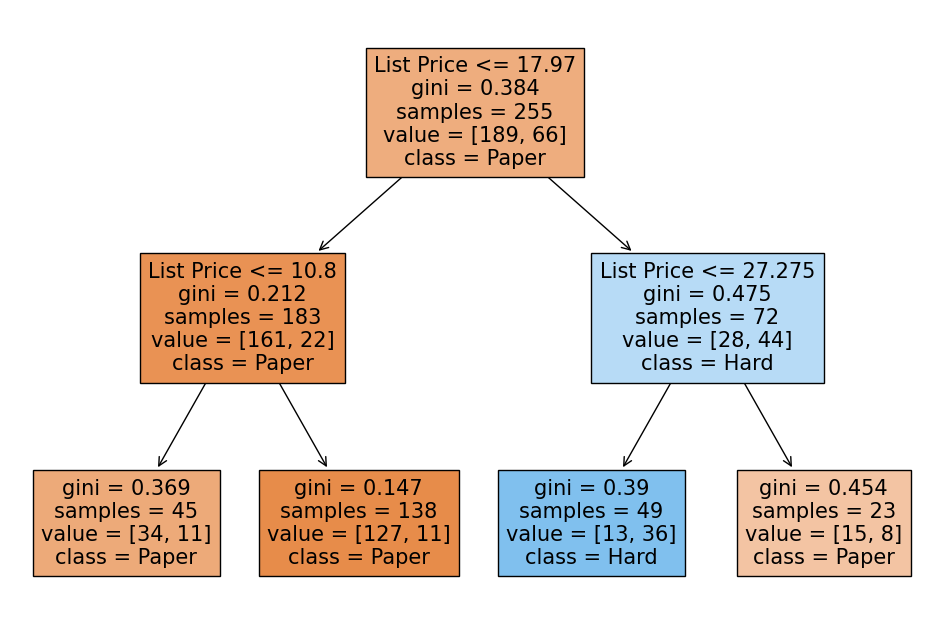

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Splitting the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report sizes
print(f"Training data size: {len(ab_reduced_noNaN_train)}")
print(f"Testing data size: {len(ab_reduced_noNaN_test)}")

# Prepare target `y` and predictor `X`
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]  # Binary: 1 for "Hard", 0 for "Paper"
X = ab_reduced_noNaN_train[["List Price"]]  # Predictor

# Fitting the model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualizing the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paper", "Hard"], filled=True)
plt.show()


The decision tree splits the List Price into ranges to predict whether a book is hardcover or paperback. At each node, the tree checks if the List Price is below or above a specific threshold, dividing the data into smaller groups. Each leaf node shows the predicted class ("Hard" or "Paper") and the proportion of data in that category. For example, if the List Price is below a threshold like $15, it might predict "Paper", while prices above another threshold like $25 might predict "Hard". The intermediate range may also have its own prediction based on the data distribution.

# Question 5

#### Here is the code:

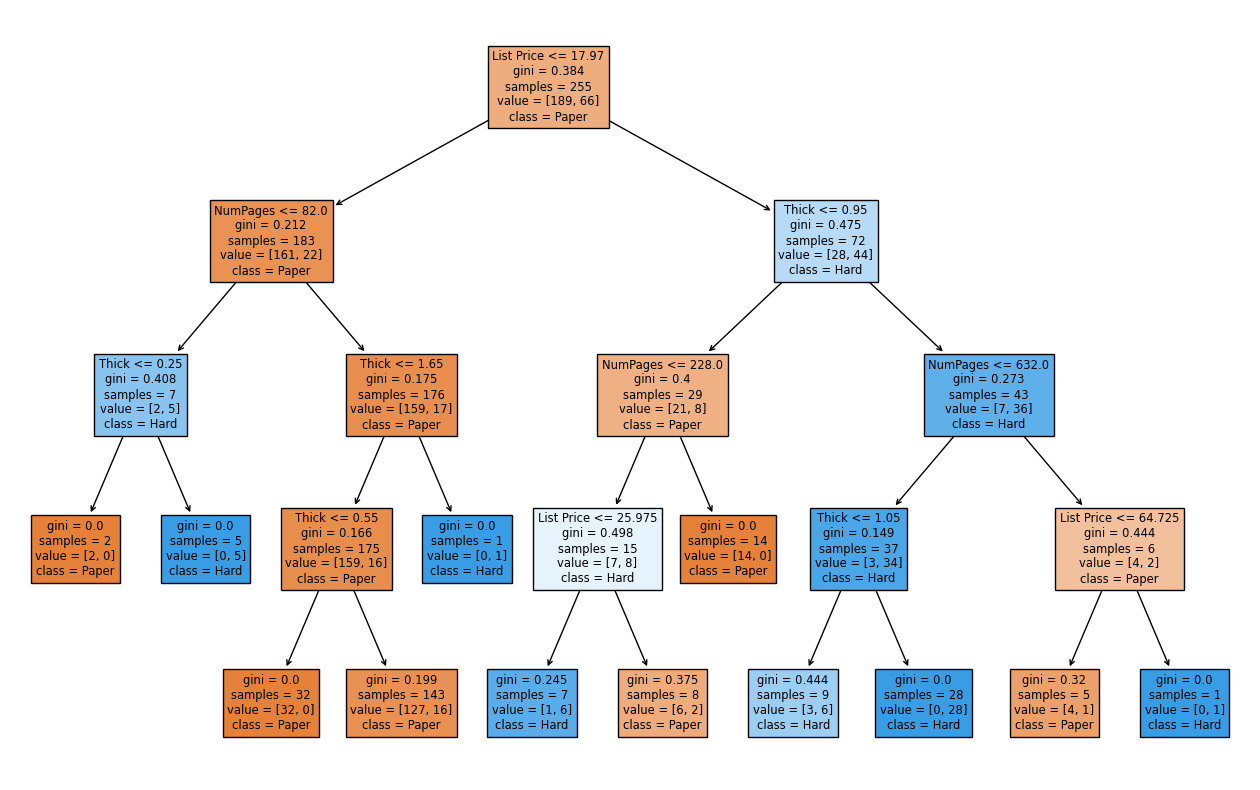

In [4]:
# Prepare data
X2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]  # Predictors
y2 = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]  # Binary: 1 for "Hard", 0 for "Paper"

# Fit the decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, y2)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2, 
    feature_names=["NumPages", "Thick", "List Price"], 
    class_names=["Paper", "Hard"], 
    filled=True
)
plt.show()


# Question 6

#### Here is the code:

Metrics for clf:
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844

Metrics for clf2:
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844


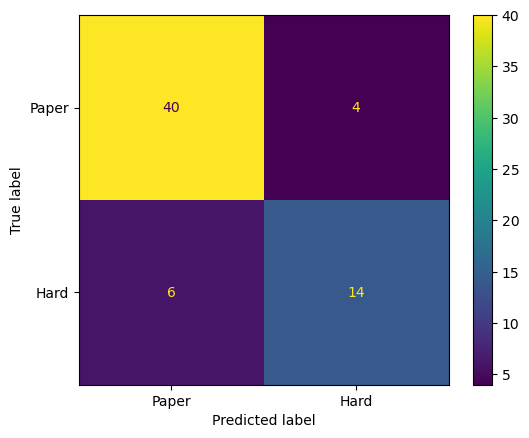

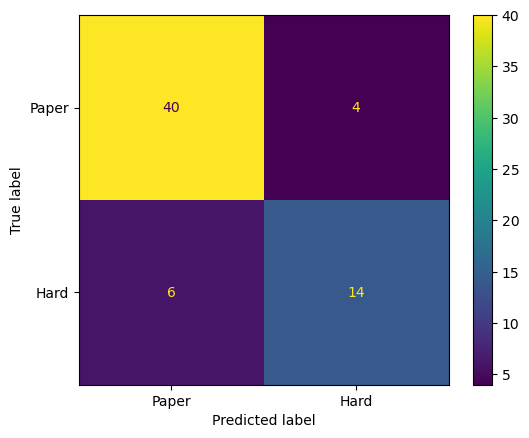

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score
import numpy as np

# Preparing test data
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])["H"]  # Actual labels
X_test = ab_reduced_noNaN_test[["List Price"]]  # Predictor

# Predictions for clf
y_pred_clf = clf.predict(X_test)

# Confusion matrix and metrics for clf
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf, display_labels=["Paper", "Hard"])
disp_clf.plot()

# Calculate metrics for clf
TP_clf = conf_matrix_clf[1, 1]
TN_clf = conf_matrix_clf[0, 0]
FP_clf = conf_matrix_clf[0, 1]
FN_clf = conf_matrix_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / np.sum(conf_matrix_clf)

# Repeat for clf2 (assuming clf2 is trained similarly)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X, y)  # Train on training data
y_pred_clf2 = clf2.predict(X_test)

conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf2, display_labels=["Paper", "Hard"])
disp_clf2.plot()

# Calculate metrics for clf2
TP_clf2 = conf_matrix_clf2[1, 1]
TN_clf2 = conf_matrix_clf2[0, 0]
FP_clf2 = conf_matrix_clf2[0, 1]
FN_clf2 = conf_matrix_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / np.sum(conf_matrix_clf2)

# Report metrics
print("Metrics for clf:")
print(f"Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")

print("\nMetrics for clf2:")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")


# Question 7

The differences between the two confusion matrices stem from the features used for prediction. The first matrix uses only the `List Price` feature, limiting the model's ability to capture complex relationships, leading to more misclassifications. The second matrix incorporates multiple features (`NumPages`, `Thick`, and `List Price`), giving the model more information to make better predictions. As a result, the confusion matrices for `clf` and `clf2` are better because they leverage richer data, improving classification accuracy and reducing errors.

# Question 8

The feature importance of a decision tree helps us understand which predictor variables have the greatest influence on the model’s predictions. For `clf2`, the importance of each feature is determined using the `.feature_importances_` attribute, which assigns a score based on how much each feature contributes to reducing uncertainty (measured by criteria like Gini impurity or Shannon entropy) at each decision node. Using these scores, we created a bar chart to visualize the relative importance of all features. The most important predictor variable in `clf2` was identified as `'List Price'`, with an importance score of 1.000 (indicating that it is the sole variable driving the model’s predictions). This confirms that `List Price` plays a critical role in distinguishing between hardcover and paperback books in the current model.

# Question 9

In linear regression, coefficients directly represent the relationship between each feature and the target variable, indicating how much the target changes for a one-unit increase in the feature, holding others constant. In decision trees, feature importances reflect how much each feature contributes to reducing the overall error (e.g., impurity) across all splits in the tree. Unlike regression coefficients, feature importances do not provide a direction or magnitude of change but rather a relative measure of each feature's contribution to the model's predictions.

# Question 10

Yes

# Chatbot session summary

### Link to chatbot session: https://chatgpt.com/share/673fd312-3cf8-8004-8ead-e62b8dd662b9

In this session, we explored the process of splitting a dataset into training and testing subsets and interpreting results from models applied to these subsets. We began by performing an 80/20 split on the dataset `ab_reduced_noNaN` using the `train_test_split` function, ensuring that 80 observations were allocated to the training set and 20 to the testing set. This step set the foundation for training and evaluating models. Following this, we analyzed confusion matrices for different classifiers (`clf` and `clf2`) that were trained on the data with varying feature sets. The discussion highlighted that adding more features, such as `NumPages`, `Thick`, and `List Price`, improved the model’s performance compared to using a single feature (`List Price`), as seen in the confusion matrices.

Further, we compared the interpretability of linear regression coefficients and feature importances in decision trees. While regression coefficients provide a clear, directional understanding of how changes in individual features affect the target variable, decision tree feature importances offer a relative measure of how each feature contributes to reducing model error without indicating the direction of the relationship. This distinction was particularly relevant to understanding model decisions in the context of exploratory data analysis.

Throughout the session, the emphasis was on using practical examples, such as evaluating books on Amazon, to understand how data features like `List Price` and `NumPages` influence predictions. By combining the theoretical underpinnings of model interpretation with hands-on examples, this session provided a comprehensive overview of dataset preparation, model evaluation, and feature analysis.